# Biodiversity in National Parks

For this project, I interpreted biodiversity data from the National Park Service, particularly around various species observed in different national park locations.

I attempted to view my work from the perspective of a biodiversity analyst for the National Park Service. The National Park Service wants to ensure the survival of at-risk species and maintain biodiversity within their parks. Therefore, my main objectives were to understand species characteristics and their conservation status, and those species and their relationship to the national parks. The following are some questions I posed:

- What is the distribution of conservation status for species?
- Are certain types of species more likely to be endangered?
- Are the differences between species and their conservation status significant?
- Which animal is most prevalent, and what is their distribution amongst parks?

You can find the data for this project [here](https://irma.nps.gov/NPSpecies/Search).

## Preparation

First, I imported **Pandas**, **NumPy**, **pyplot**, and **seaborn**.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Then, I loaded the data into a data frame and glanced at its contents using `.head()`.

In [2]:
df = pd.read_csv("NPSpecies_FullListWithDetails_20210605220758.csv")
df.head()

,Park Name,Category,Scientific Name,Common Names,Observations,T&E
0,Bryce Canyon National Park,Mammal,Antilocapra americana,Pronghorn,NaN,NaN
1,Bryce Canyon National Park,Mammal,Oreamnos americanus,Mountain Goat,NaN,NaN
2,Bryce Canyon National Park,Mammal,Ovis canadensis,Bighorn Sheep,NaN,SC
3,Bryce Canyon National Park,Mammal,Cervus canadensis,Elk,NaN,NaN
4,Bryce Canyon National Park,Mammal,Odocoileus hemionus,Mule Deer,NaN,NaN


I changed the name of column `T&E` ("Threatened and Endangered") to `Conservation Status` to make my analysis more clear.

In [3]:
df = df.rename({'T&E':'Conservation Status'}, axis = 'columns')
df.head()

,Park Name,Category,Scientific Name,Common Names,Observations,Conservation Status
0,Bryce Canyon National Park,Mammal,Antilocapra americana,Pronghorn,NaN,NaN
1,Bryce Canyon National Park,Mammal,Oreamnos americanus,Mountain Goat,NaN,NaN
2,Bryce Canyon National Park,Mammal,Ovis canadensis,Bighorn Sheep,NaN,SC
3,Bryce Canyon National Park,Mammal,Cervus canadensis,Elk,NaN,NaN
4,Bryce Canyon National Park,Mammal,Odocoileus hemionus,Mule Deer,NaN,NaN


Next, I performed a check of the dimensions of the data set. There are 35,716 rows and six columns.

In [4]:
print(f"df shape: {df.shape}")

df shape: (35716, 6)


As I explored the data more in-depth, I decided to find the number of distinct species present. There are 33,628 unique species listed—WOW!

In [5]:
print(f"number of species: {df['Scientific Name'].nunique()}")

number of species: 33628


Next, I wanted to find the number of classified living creatures represented in the data. There are 14, including animals and plants.

In [6]:
print(f"number of categories: {df['Category'].nunique()}")
print(f"categories: {df['Category'].unique()}")

number of categories: 14
categories: ['Mammal' 'Bird' 'Reptile' 'Vascular Plant' 'Non-vascular Plant'
 'Crab/Lobster/Shrimp' 'Slug/Snail' 'Spider/Scorpion' 'Insect'
 'Other Non-vertebrates' 'Fungi' 'Protozoa' 'Chromista' 'Bacteria']


Then, I wanted to drill down to see the size of each `Category`. *Insects* are the largest share of species with 14,053 in the data, with *reptiles* being the smallest with 99.

In [7]:
df.groupby("Category").size()

Category
Bacteria                   296
Bird                      1060
Chromista                  855
Crab/Lobster/Shrimp        183
Fungi                     5212
Insect                   14053
Mammal                     321
Non-vascular Plant        1037
Other Non-vertebrates     1063
Protozoa                   275
Reptile                     99
Slug/Snail                 347
Spider/Scorpion           4631
Vascular Plant            6284
dtype: int64

Another column I wanted to explore is `Conservation Status`. The column has four categories, `SC`, `T`, `DM`, `E`, and  `nan` (not a number) values.

**Note:** Here, `nan` denotes that these species are not under a conservation status.

In [8]:
print(f"number of conservation statuses: {df['Conservation Status'].nunique()}")
print(f"unique conservation statuses: {df['Conservation Status'].unique()}")

number of conservation statuses: 4
unique conservation statuses: [nan 'SC' 'T' 'DM' 'E']


Instead of leaving the statuses ambiguous, I decided to check the source for their proper terms and update them accordingly.

In [9]:
df['Conservation Status'] = df['Conservation Status'].replace({'SC': 'Species of Concern',
'T': 'Threatened',
'DM': 'In Recovery',
'E': 'Endangered'})
print(f"unique conservation statuses: {df['Conservation Status'].unique()}")

unique conservation statuses: [nan 'Species of Concern' 'Threatened' 'In Recovery' 'Endangered']


Next, I performed a count of the number of observations in the breakdown of the categories in `Conservation Status`. There are 35,090 `nan` values. There are also 597 species of concern, 13 endangered, 7 threatened, and 9 in recovery. 

In [10]:
print(f"nan values: {df['Conservation Status'].isna().sum()}")
df.groupby("Conservation Status").size()

nan values: 35090


Conservation Status
Endangered             13
In Recovery             9
Species of Concern    597
Threatened              7
dtype: int64

The next task was to check the number of parks in the dataset; there are only 4.

In [11]:
print(f"number of parks: {df['Park Name'].nunique()}")
print(f"unique parks: {df['Park Name'].unique()}")

number of parks: 4
unique parks: ['Bryce Canyon National Park' 'Great Smoky Mountains National Park'
 'Yellowstone National Park' 'Yosemite National Park']


There are 306,120 total sightings logged  in the data set; that's a lot of observations!

In [12]:
print(f"number of observations: {df['Observations'].sum()}")

number of observations: 306120.0


## Analysis

As I began analyzing the data after my initial exploration, my first task was to clean and explore the `Conservation Status` column. 

The `Conservation Status` column has several possible values:
- `Species of Concern`: declining or appear to need conservation
- `Threatened`: vulnerable to endangerment soon
- `Endangered`: seriously at risk of extinction
- `In Recovery`: currently neither in danger of extinction throughout all or a significant portion of its range

During my exploration, I detected a lot of `nan` values. I converted them to `No Intervention`.

In [13]:
df.fillna('No Intervention', inplace=True)
df.groupby('Conservation Status')['Scientific Name'].nunique()

Conservation Status
Endangered               13
In Recovery               4
No Intervention       33268
Species of Concern      337
Threatened                6
Name: Scientific Name, dtype: int64

Next, I examined the different categories nested in the `Conservation Status` column, except for those that do not require an intervention.

For those in the `Endangered` status, 5 are **mammals**, and 4 were **birds**. There are six **birds** and three **mammals** in the `In Recovery` status, which could mean the **birds** are bouncing back more than the mammals. 

In [14]:
conservationCategory = df[df['Conservation Status'] != "No Intervention"]\
    .groupby(["Conservation Status", "Category"])['Scientific Name']\
    .count()\
    .unstack()

conservationCategory

Category,Bird,Crab/Lobster/Shrimp,Fungi,Insect,Mammal,Non-vascular Plant,Reptile,Slug/Snail,Spider/Scorpion,Vascular Plant
Conservation Status,,,,,,,,,,
Endangered,4.0,NaN,1.0,1.0,5.0,NaN,NaN,NaN,1.0,1.0
In Recovery,6.0,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN
Species of Concern,414.0,3.0,8.0,34.0,53.0,11.0,5.0,8.0,10.0,51.0
Threatened,NaN,NaN,NaN,NaN,5.0,NaN,NaN,1.0,NaN,1.0


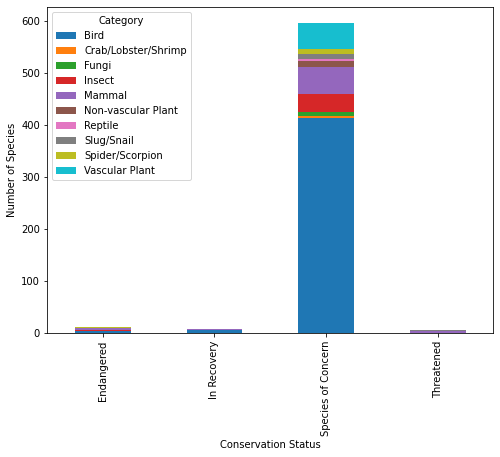

In [15]:
ax = conservationCategory.plot(kind = 'bar', figsize=(8,6), 
                               stacked=True)
ax.set_xlabel("Conservation Status")
ax.set_ylabel("Number of Species");

The next question I wanted to answer was if certain species are more likely to be endangered. To answer the question, first, I created a new column named `Is Protected` which included any species with a value other than `No Intervention`. 

In [16]:
df['Is Protected'] = df['Conservation Status'] != 'No Intervention'

Once I created the new column, I grouped it by `Category` and `Is Protected` to show the breakdown of each species type and protection status. 

It's easy to see that **Birds**, **Vascular Plants**, and **Mammals** have a higher absolute number of species protected. 

In [17]:
category_counts = df.groupby(['Category', 'Is Protected'])\
                        ['Scientific Name'].nunique()\
                        .reset_index()\
                        .pivot(columns='Is Protected',
                                      index='Category',
                                      values='Scientific Name')\
                        .reset_index()
category_counts.columns = ['Category', 'Not Protected', 'Protected']
category_counts

,Category,Not Protected,Protected
0,Bacteria,294.0,NaN
1,Bird,304.0,191.0
2,Chromista,790.0,NaN
3,Crab/Lobster/Shrimp,173.0,3.0
4,Fungi,5194.0,9.0
5,Insect,13710.0,35.0
6,Mammal,158.0,36.0
7,Non-vascular Plant,1021.0,11.0
8,Other Non-vertebrates,1046.0,NaN
9,Protozoa,268.0,NaN


Absolute numbers are not always the most useful statistic. Therefore, it's crucial also to calculate the rate of protection that each `Category` exhibits in the data. From this analysis, one can see that ~19 percent of **mammals** and ~39 percent of **birds** were under guard. 

In [18]:
category_counts['percent_protected'] = category_counts['Protected'] / \
                                      (category_counts['Protected'] + category_counts['Not Protected']) * 100
category_counts

,Category,Not Protected,Protected,percent_protected
0,Bacteria,294.0,NaN,NaN
1,Bird,304.0,191.0,38.585859
2,Chromista,790.0,NaN,NaN
3,Crab/Lobster/Shrimp,173.0,3.0,1.704545
4,Fungi,5194.0,9.0,0.172977
5,Insect,13710.0,35.0,0.254638
6,Mammal,158.0,36.0,18.556701
7,Non-vascular Plant,1021.0,11.0,1.065891
8,Other Non-vertebrates,1046.0,NaN,NaN
9,Protozoa,268.0,NaN,NaN


#### Statistical Significance

I ran a couple of chi-squared tests to see if different species have statistically significant differences in conservation status rates. To start, I created a contingency table. 

For the first test named `contingency1`, I examined the difference between **Mammals** and **Birds**.

The second value (~2.4) is the p-value. The standard p-value to test statistical significance is 0.05. For the value retrieved from this test, the value of 2.4 is much larger than 0.05. There doesn't seem to be any significant relationship between **mammals** and **birds**, i.e., independent variables. 

In [19]:
from scipy.stats import chi2_contingency

contingency1 = [[53, 158],
              [221, 304]]
chi2_contingency(contingency1)

(17.843134063155507,
 2.398832418480901e-05,
 1,
 array([[ 78.55163043, 132.44836957],
        [195.44836957, 329.55163043]]))

The next pair I tested the difference between was **reptiles** and **mammals**.

This time the p-value is ~0.0, which is below the standard threshold of 0.05. Therefore, the difference between **reptiles** and **mammals** is considered statistically significant. **Mammals** have a significantly higher rate of needed protection compared to **reptiles**. 

In [20]:
contingency2 = [[53, 158],
               [8, 89]]
chi2_contingency(contingency2)

(10.87012078285954,
 0.0009772815622185792,
 1,
 array([[ 41.78896104, 169.21103896],
        [ 19.21103896,  77.78896104]]))

#### Species in Parks

The next set of analyses come from species sighting data.

First, I looked at species' `Common Names` to get an idea of the most prevalent animals in the dataset. I split the data up into individual names. 

In [21]:
from itertools import chain
import string

def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text

Common_Names = df[df['Category'] == "Mammal"]\
    ['Common Names']\
    .apply(remove_punctuations)\
    .str.split().tolist()

Common_Names[76:83]

[['Domesticated', 'Cattle'],
 ['Sheep'],
 ['Elk'],
 ['WhiteTailed', 'Deer'],
 ['Wild', 'Hog'],
 ['Coyote'],
 ['Gray', 'Wolf']]

Next, I cleaned up duplicate words in each row to not count more than once per species.

In [22]:
cleanRows = []

for item in Common_Names:
    item = list(dict.fromkeys(item))
    cleanRows.append(item)
    
cleanRows[76:83]

[['Domesticated', 'Cattle'],
 ['Sheep'],
 ['Elk'],
 ['WhiteTailed', 'Deer'],
 ['Wild', 'Hog'],
 ['Coyote'],
 ['Gray', 'Wolf']]

Then, I collapsed the words into one list for easier use.

In [23]:
res = list(chain.from_iterable(i if isinstance(i, list) else [i] for i in cleanRows))
res[76:83]

['WhiteTailed',
 'Jackrabbit',
 'Desert',
 'Cottontail',
 'Mountain',
 'Cottontail',
 'American']

To make the remainder of my analysis less complicated, I set all `No Intervention` values under the `Observations` column to `0` and the type to `float`.

In [24]:
df.loc[df['Observations'] == 'No Intervention', 'Observations'] = '0'
df['Observations'] = df['Observations'].astype(float)
df.head()

,Park Name,Category,Scientific Name,Common Names,Observations,Conservation Status,Is Protected
0,Bryce Canyon National Park,Mammal,Antilocapra americana,Pronghorn,0.0,No Intervention,False
1,Bryce Canyon National Park,Mammal,Oreamnos americanus,Mountain Goat,0.0,No Intervention,False
2,Bryce Canyon National Park,Mammal,Ovis canadensis,Bighorn Sheep,0.0,Species of Concern,True
3,Bryce Canyon National Park,Mammal,Cervus canadensis,Elk,0.0,No Intervention,False
4,Bryce Canyon National Park,Mammal,Odocoileus hemionus,Mule Deer,0.0,No Intervention,False


At this point, the data was ready to count the number of occurrences of each word. From this analysis, I determined that **bat** occurred the most, 31 times, while **Mouse** came up 29 times.

In [25]:
words_counted = []

for i in res:
    x = res.count(i)
    words_counted.append((i,x))

pd.DataFrame(set(words_counted), columns =['Word', 'Count']).sort_values("Count", ascending = False).head(10)

,Word,Count
16,Bat,31
23,Mouse,29
165,Myotis,24
75,Shrew,23
94,Squirrel,19
103,Vole,19
77,Chipmunk,18
58,American,18
130,Western,15
59,Northern,15


There are several different scientific names for different types of bats in the data, so I wanted to figure out which rows of species are referring to bats. I created a new column made up of boolean values to check if `is_bat` is `True`.

In [26]:
df['is_bat'] = df['Common Names'].str.contains(r"\bBat\b", regex = True)
df.head(10)

,Park Name,Category,Scientific Name,Common Names,Observations,Conservation Status,Is Protected,is_bat
0,Bryce Canyon National Park,Mammal,Antilocapra americana,Pronghorn,0.0,No Intervention,False,False
1,Bryce Canyon National Park,Mammal,Oreamnos americanus,Mountain Goat,0.0,No Intervention,False,False
2,Bryce Canyon National Park,Mammal,Ovis canadensis,Bighorn Sheep,0.0,Species of Concern,True,False
3,Bryce Canyon National Park,Mammal,Cervus canadensis,Elk,0.0,No Intervention,False,False
4,Bryce Canyon National Park,Mammal,Odocoileus hemionus,Mule Deer,0.0,No Intervention,False,False
5,Bryce Canyon National Park,Mammal,Canis latrans,Coyote,0.0,Species of Concern,True,False
6,Bryce Canyon National Park,Mammal,Urocyon cinereoargenteus,Common Gray Fox,0.0,No Intervention,False,False
7,Bryce Canyon National Park,Mammal,Vulpes macrotis,Kit Fox,0.0,No Intervention,False,False
8,Bryce Canyon National Park,Mammal,Vulpes vulpes,Red Fox,0.0,No Intervention,False,False
9,Bryce Canyon National Park,Mammal,Lynx canadensis,Canada Lynx,1.0,Threatened,True,False


Here is a subset of the data where `is_bat` is `True`. There are a lot of species of bats and a mix of protected vs. non-protected species. 

In [27]:
bat_observations = df[df.is_bat]
bat_observations.head()

,Park Name,Category,Scientific Name,Common Names,Observations,Conservation Status,Is Protected,is_bat
19,Bryce Canyon National Park,Mammal,Nyctinomops macrotis,Big Free-Tailed Bat,0.0,Species of Concern,True,True
20,Bryce Canyon National Park,Mammal,Tadarida brasiliensis,Brazilian Free-Tailed Bat,0.0,No Intervention,False,True
21,Bryce Canyon National Park,Mammal,Antrozous pallidus,Pallid Bat,0.0,Species of Concern,True,True
22,Bryce Canyon National Park,Mammal,Corynorhinus townsendii,Townsend'S Big-Eared Bat,0.0,No Intervention,False,True
23,Bryce Canyon National Park,Mammal,Eptesicus fuscus,Big Brown Bat,0.0,Species of Concern,True,True


I wanted to see how many total bat observations (across all species) were made at each national park by workers.  

Great Smoky Mountains National Park has the most observations (48), and the Bryce Canyon National Park has none. 

In [28]:
bat_observations.groupby('Park Name')['Observations'].sum().reset_index()

,Park Name,Observations
0,Bryce Canyon National Park,0.0
1,Great Smoky Mountains National Park,48.0
2,Yellowstone National Park,1.0
3,Yosemite National Park,39.0


Here, I wanted to see each park broken down by protected bat sightings vs. non-protected bat sightings. Except for Bryce Canyon National Park, every place has more sightings of protected bats—a good sign!

In [29]:
obs_by_park = bat_observations.groupby(['Park Name', 'Is Protected'])['Observations'].sum().reset_index()
obs_by_park

,Park Name,Is Protected,Observations
0,Bryce Canyon National Park,False,0.0
1,Bryce Canyon National Park,True,0.0
2,Great Smoky Mountains National Park,False,19.0
3,Great Smoky Mountains National Park,True,29.0
4,Yellowstone National Park,False,0.0
5,Yellowstone National Park,True,1.0
6,Yosemite National Park,False,6.0
7,Yosemite National Park,True,33.0


Below is a plot from the output of the last data manipulation. One can see that there are more sightings of protected bats compared to non-protected species. The national parks are doing a great job protecting their bat populations! 

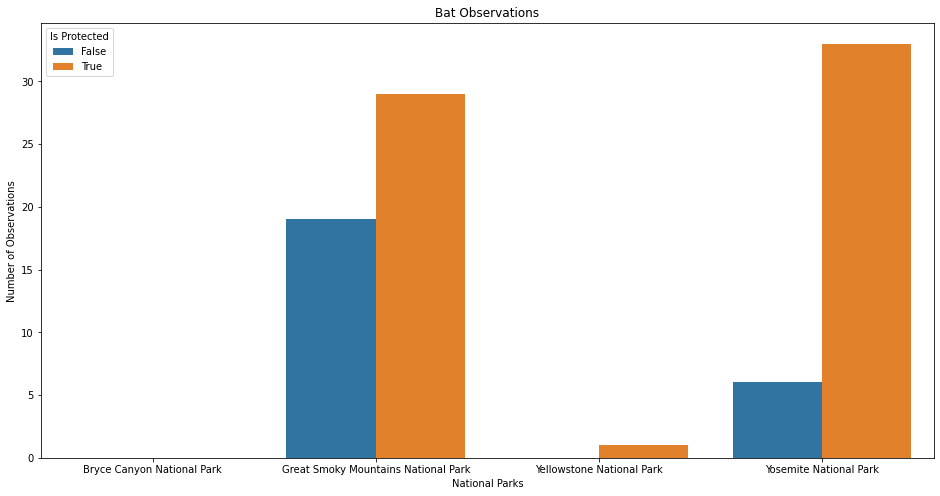

In [30]:
plt.figure(figsize=(16, 8))
sns.barplot(x=obs_by_park['Park Name'], y=obs_by_park['Observations'], hue=obs_by_park['Is Protected'], ci=None)
plt.xlabel('National Parks')
plt.ylabel('Number of Observations')
plt.title('Bat Observations')
plt.show()

## Conclusion

This project makes several inferences about the various species in four of the National Parks that comprised this data set.

This project was also able to answer some of the questions first posed in the beginning:

- What is the distribution of conservation status for species?
    - The vast majority of species were not part of the conservation effort (33,473 vs. 377).
- Are certain types of species more likely to be endangered?
    - **Mammals** and **birds** had the highest percentage of being in protection.
- Are the differences between species and their conservation status significant?
    - While **mammals** and **birds** did not significantly differ in conservation percentage, **mammals** and **reptiles** exhibited a statistically significant difference.
- Which animal is most prevalent, and what is their distribution amongst parks?
    - **Bats** were sighted the most, and they were most likely to be found at Great Smoky Mountains National Park.